# Υπολογιστική Γεωμετρία - Εργασία 2022-2023

# Μέρος Β - Υλοποίηση 2: Γεωμετρική Αναζήτηση
---

**Ευγενία Κοζή (1115202000082)**

**1) <u>Αλγόριθμος ορθογώνιας γεωμετρικής αναζήτησης με KD-Trees</u>**

Δημιουργούμε τη δομή του kd-δέντρου και υλοποιούμε τη συνάρτηση rangesearch που αναζητεί τα σημεία που βρίσκονται μέσα στο ορθογώνιο που έχουμε ορίσει. Η αναζήτηση δε θα επιστρέψει τα σημεία που βρίσκονται πάνω σε κάποια πλευρά του ορθογωνίου.

In [ ]:
# Checks if a point is in an orthogonal rectangle
def point_in_rectangle(point, rectangle):
  bl = rectangle[0]
  tr = rectangle[1]
  if (point[0] > bl[0] and point[0] < tr[0] and point[1] > bl[1] and point[1] < tr[1]):
      return True
  else:
    return False

# KD-Trees
class kdTree():

  # Create KD-Tree
  def __init__(self, P, d = 0):

    n = len(P)
    m = n // 2
    P.sort(key = lambda x: x[d])
    self.point = P[m]
    self.d = d
    d = (d + 1) % len(P[0])
    self.left = self.right = None

    if m > 0:
      self.left = kdTree(P[:m], d)
    if n - (m + 1) > 0:
      self.right = kdTree(P[m+1:], d)

  # Search KD-Tree
  def rangesearch(self, rectangle):
    p = self.point

    if point_in_rectangle(p, rectangle):
      yield p

    min_v = rectangle[0][self.d]
    max_v = rectangle[1][self.d]
    split = p[self.d]

    if self.left is not None and split >= min_v:
      yield from self.left.rangesearch(rectangle)
    if self.right is not None and split <= max_v:
      yield from self.right.rangesearch(rectangle)

**2) <u>Πολυπλοκότητα Αλγορίθμου</u>**

Η κατασκευή ενός kd-δέντρου με n σημεία χρειάζεται χρόνο O(nlogn). Ο αλγόριθμος είναι αναδρομικός και σε κάθε επίπεδο χωρίζει τα σημεία στη μέση.

Στην ορθγώνια αναζήτηση σημείων η πολυπλοκότητα αυξάνεται όσο περισσότερα είναι τα σημεία που βρίσκονται μέσα στο ορθογώνιο. Σε ένα average case επισκεπτόμαστε μόνο ένα μέρος των κόμβων του δέντρου, κατά μέσο όρο $\sqrt{n}$ κόμβοι. Οπότε η πολυπλοκότητα αναζήτησης είναι περίπου $O(\sqrt{n} + k)$.

**<u>Εφαρμογή 2</u>**

**create_points:** Συνάρτηση δημιουργίας **n** σημείων, των οποίων οι συντεταγμένες είναι ακέραιοι αριθμοί με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$ . Δεν υπάρχουν δύο ίδια σημεία (ίδια τετμημένη και ίδια τεταγμένη) στο σύνολο σημείων που επιστρέφει η συνάρτηση.

In [ ]:
import numpy as np
from numpy import random

def create_points(n, min_val, max_val):
  points = []

  for i in range(0, n):
    new_point = (random.randint(min_val, max_val), random.randint(min_val, max_val))
    if new_point not in points:
      points.append(new_point)
    else:
      i = i - 1

  return points

Δημιουργούμε ένα σύνολο P με 60 σημεία στο επίπεδο και μία ορθογώνια έκταση. Οι συντεταγμένες των σημείων είναι ακέραιοι αριθμοί με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$ και δεν υπάρχουν δύο ίδια σημεία (ίδια τετμημένη και ίδια τεταγμένη) στο σύνολο P.



In [ ]:
# Create points

n = 60 # number of points
min_val = 0
max_val = 100
P = create_points(n, min_val, max_val)

Ορίζουμε μία ορθογώνια έκταση με δύο σημεία: το κάτω αριστερά (οι ελάχιστες τιμές των x, y) και το πάνω δεξιά (οι μέγιστες τιμές των x, y).

Δημιουργούμε ένα kd-δέντρο και εισάγουμε τα σημεία του P σε αυτό.

Εφαρμόζουμε τον αλγόριθμο γεωμετρικής αναζήτησης με KD-Trees, δίνοντάς του ως όρισμα το kd-δέντρο και την ορθογώνια έκταση που ορίσαμε. Η αναζήτηση επιστρέφει τα σημεία του P που βρίσκονται εντός της ορθογώνιας έκτασης.

Εκτυπώνουμε σχήμα με τα σημεία και την ορθογώνια έκταση για να φανούν οπτικώς τα αποτελέσματα.

60 points:
[(29, 32), (6, 18), (79, 70), (33, 3), (4, 73), (81, 13), (7, 34), (64, 76), (49, 37), (48, 28), (45, 1), (63, 1), (20, 90), (93, 3), (88, 38), (73, 78), (46, 75), (55, 59), (66, 66), (41, 49), (34, 92), (12, 86), (99, 11), (19, 14), (80, 71), (82, 0), (95, 4), (61, 9), (89, 20), (31, 70), (8, 38), (45, 84), (62, 5), (69, 63), (10, 83), (92, 48), (66, 79), (32, 48), (85, 19), (51, 24), (16, 82), (1, 55), (36, 72), (16, 53), (56, 72), (95, 48), (73, 74), (61, 60), (72, 48), (90, 54), (29, 91), (3, 40), (47, 21), (9, 38), (96, 78), (7, 10), (44, 98), (26, 74), (90, 30), (7, 46)] 

Result: 19 points
[(49, 37), (32, 48), (29, 32), (41, 49), (26, 74), (36, 72), (31, 70), (46, 75), (72, 48), (73, 74), (66, 66), (61, 60), (55, 59), (69, 63), (64, 76), (56, 72), (66, 79), (79, 70), (73, 78)] 



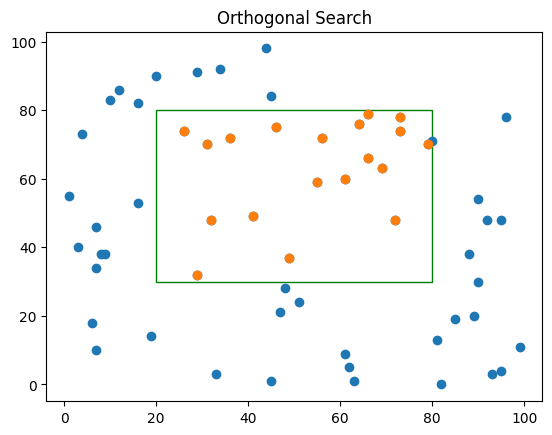

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(len(P), "points:")
print(P, "\n")

# Define rectangle
min_x = 20
max_x = 80
min_y = 30
max_y = 80
bottom_left = (min_x, min_y)
bottom_right = (max_x, max_y)
orthogonal_rectangle = [bottom_left, bottom_right]

# Create a kd-tree from P
tree = kdTree(P)

# Search
result = list(tree.rangesearch(orthogonal_rectangle))
print("Result:", len(result), "points")
print(result, "\n")

# Plot
points_array = np.array(P) # 2D Array with points
result_array = np.array(result)
plt.plot(points_array[:, 0], points_array[:, 1], 'o') # initial points
plt.plot(result_array[:, 0], result_array[:, 1], 'o') # points in rectangle
rectangle = plt.Rectangle(bottom_left, max_x-min_x, max_y-min_y, fc="white", ec="green") # rectangle
plt.gca().add_patch(rectangle)
plt.title("Orthogonal Search")
plt.show()

**<u>Εφαρμογή 3: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay</u>**

Ορίζουμε ένα σύνολο P που αποτελείται από **n** σημεία στο επίπεδο. Οι συντεταγμένες των σημείων είναι ακέραιοι αριθμοί με τετμημένη $MIN\leq x\leq MAX$ και τεταγμένη $MIN\leq y\leq MAX$ και δεν υπάρχουν δύο ίδια σημεία (ίδια τετμημένη και ίδια τεταγμένη) στο σύνολο P.

In [ ]:
# Create points for Voronoi Diagram and Delaunay Triangulation

n = 20 # points
min_val = 0
max_val = 100

points = create_points(n, min_val, max_val)
points_array = np.array(points) # 2D Array with points

**1) <u>Αντιστοιχία: Τριγωνοποίηση Delaunay - Διάγραμμα Voronoi</u>**

* Εκτυπώνουμε πρώτα το διάγραμμα Voronoi για το σύνολο σημείων που δημιουργήσαμε.

* Η τριγωνοποίηση Delaunay είναι το δυϊκό του διαγράμματος Voronoi και αυτό φαίνεται στο δεύτερο σχήμα που εκτυπώνουμε.

* Στο τελευταίο σχήμα έχουμε την τριγωνοποίηση Delaunay για το σύνολο σημείων που δημιουργήσαμε.



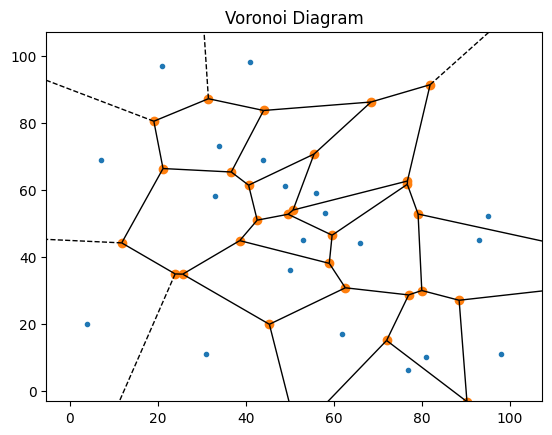

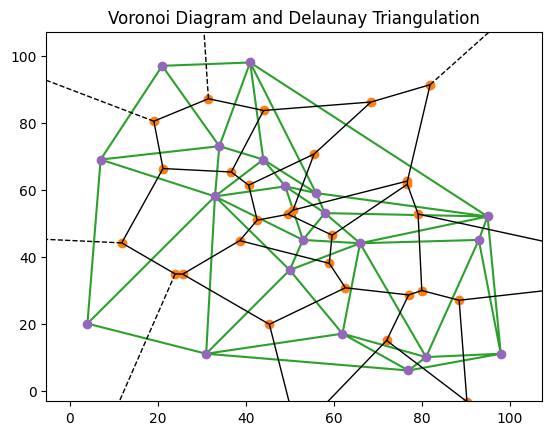

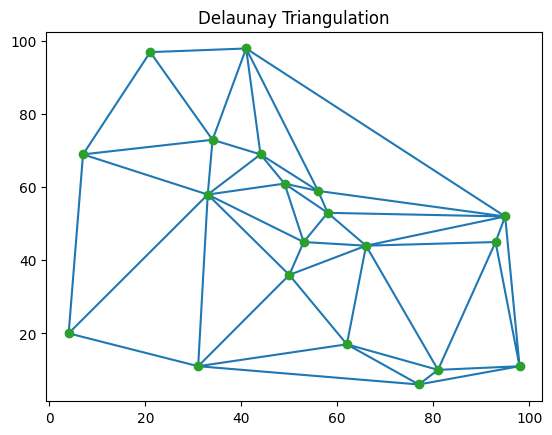

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay

vor = Voronoi(points_array)
tri = Delaunay(points_array)

# Voronoi Diagram
fig = voronoi_plot_2d(vor)
plt.title("Voronoi Diagram")
plt.show()

# Voronoi Diagram and Delaunay Triangulation
fig = voronoi_plot_2d(vor)
plt.triplot(points_array[:, 0], points_array[:, 1], tri.simplices)
plt.plot(points_array[:, 0], points_array[:, 1], 'o')
plt.title("Voronoi Diagram and Delaunay Triangulation")
plt.show()

# Delaunay Triangulation
plt.triplot(points_array[:, 0], points_array[:, 1], tri.simplices)
plt.plot(points_array[:, 0], points_array[:, 1], 'o')
plt.title("Delaunay Triangulation")
plt.show()

Σχήμα 2 (Voronoi Diagram and Delaunay Triangulation):

* Τα κελιά Voronoi αντιστοιχούν σε εστίες, δηλαδή κορυφές τριγώνων Delaunay. (μωβ)

* Κάθε ζεύγος γειτονικών κελιών (δηλαδή ακμή Voronoi) αντιστοιχεί σε μία ακμή
Delaunay, που ορίζεται από τις δύο εστίες. Οι ευθείες των δύο ακμών είναι κάθετες μεταξύ τους. (πράσινο)

* Κάθε κορυφή Voronoi αντιστοιχεί σε ένα τρίγωνο Delaunay. (πορτοκαλί)

**2) <u>Πολυπλοκότητα Αλγορίθμων**</u>

<u>Χρόνος κατασκευής διαγράμματος Voronoi</u>:
Ο μέσος χρόνος εκτέλεσης εξαρτάται από τον αριθμό των εστιών n και είναι συνήθως $O(nlogn)$, δηλαδή αυξάνεται ο χρόνος όσο περισσότερες είναι οι εστίες.

<u>Χρόνος τριγωνοποίησης Delaunay</u>: Ο αλγόριθμος δουλεύει επαναληπτικά προσθέτοντας κάθε σημείο στην τριγωνοποίηση κι ενημερώνοντας τη δομή της τριγωνοποίησης. Για n αρχικά σημεία ο χρόνος είναι $O(nlogn)$, άρα αυξάνεται όσο αυξάνονται τα σημεία.